In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('categ.csv')
data.head(10)

,Unnamed: 0,size,material,color,sleeves,demand
0,0,S,nylon,white,long,medium
1,1,XL,polyester,cream,short,high
2,2,S,silk,blue,short,medium
3,3,M,cotton,black,short,medium
4,4,XL,polyester,orange,long,medium
5,5,XS,polyester,black,short,medium
6,6,XXL,polyester,green,short,medium
7,7,L,linen,yellow,short,high
8,8,XL,linen,cream,long,high
9,9,XS,nylon,red,short,high


In [4]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [9]:
X = data.drop(['demand'], axis = 1)
y = data['demand']

In [10]:
le = LabelEncoder()

for column in X.columns:
    X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [11]:
# Initialize and train the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = nb_model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.72       893
           1       0.97      0.14      0.25       258
           2       0.62      0.70      0.66       849

    accuracy                           0.66      2000
   macro avg       0.76      0.53      0.54      2000
weighted avg       0.69      0.66      0.63      2000



In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6555

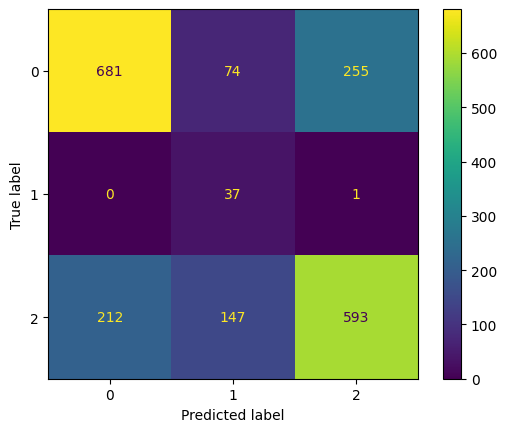

In [18]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [19]:
new_instance = pd.DataFrame([['S', 'linen', 'blue', 'short']], columns=['size', 'material', 'color', 'sleeves'])

for column in new_instance.columns:
    new_instance[column] = le.fit_transform(new_instance[column])

prediction = nb_model.predict(new_instance)

print("Prediction for the given instance:", prediction)

Prediction for the given instance: [2]


NameError: name 'pca' is not defined